In [1]:
import sys
sys.path.append("..")

In [2]:
from library.simulator import BackTester
from library.runner import Runner
from library.strategy import FridayBuyStrategy
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# CSVデータを読み込む
df = pd.read_csv(
    "../input_data/btf_periods900.csv",
)
# UNIXtimeをpandas.Timestampに変換する
df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")

rename_dict = {
    "CloseTime": "timestamp",
    "OpenPrice": "open",
    "HighPrice": "high",
    "LowPrice": "low",
    "ClosePrice": "close",
    "Volume": "volume",
}
df = df[list(rename_dict.keys())].rename(columns=rename_dict).set_index("timestamp")

config = {"slippage": 0.001, "minutes_to_expire": 600}
tester = BackTester(df, config)


In [4]:
strategy = FridayBuyStrategy(df = tester.ohlcv_df)
runner = Runner(tester=tester, strategy=strategy)
runner.run()
snapshots = tester.snapshots
#print(snapshots)

In [5]:
for order in tester.archived_orders:
    print(order.__dict__)

{'id': 0, 'timestamp': Timestamp('2023-01-27 00:00:00'), 'side': 'BUY', 'size': 0.1673078461022124, 'result': OrderResult(completion_time=Timestamp('2023-01-27 00:15:00'), completion_status='executed', cash_diff=-501519.99178183865, position_diff=0.1673078461022124)}
{'id': 1, 'timestamp': Timestamp('2023-01-28 00:00:00'), 'side': 'SELL', 'size': 0.1673078461022124, 'result': OrderResult(completion_time=Timestamp('2023-01-28 00:15:00'), completion_status='executed', cash_diff=500847.41424050776, position_diff=-0.1673078461022124)}
{'id': 2, 'timestamp': Timestamp('2023-02-03 00:00:00'), 'side': 'BUY', 'size': 0.16490551525720612, 'result': OrderResult(completion_time=Timestamp('2023-02-03 00:15:00'), completion_status='executed', cash_diff=-501691.05963390664, position_diff=0.16490551525720612)}
{'id': 3, 'timestamp': Timestamp('2023-02-04 00:00:00'), 'side': 'SELL', 'size': 0.16490551525720612, 'result': OrderResult(completion_time=Timestamp('2023-02-04 00:15:00'), completion_status='

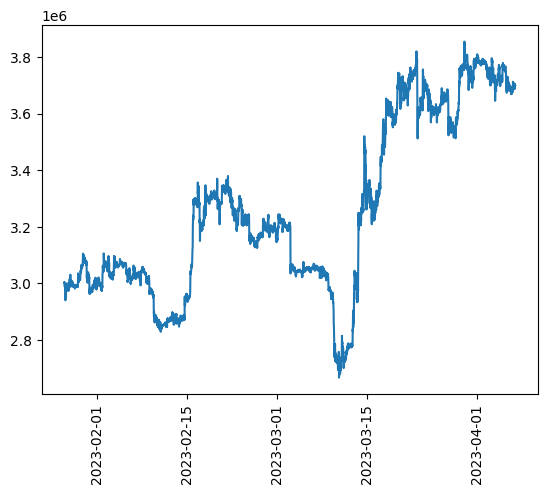

In [6]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.plot(tester.ohlcv_df.index, tester.ohlcv_df["close"])
plt.show()

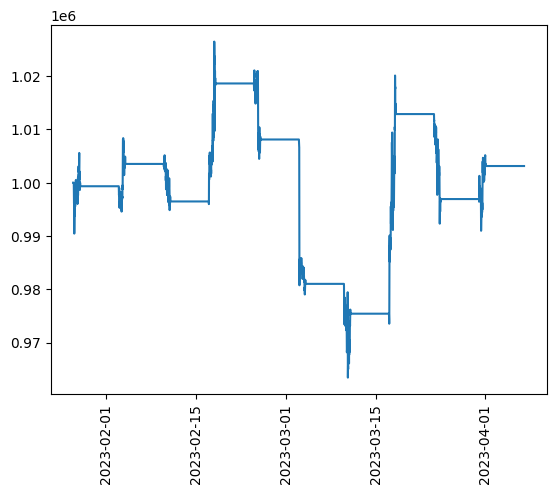

In [7]:
# めっちゃ負けるはず
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.plot(snapshots.index, snapshots["valuation"])
plt.show()

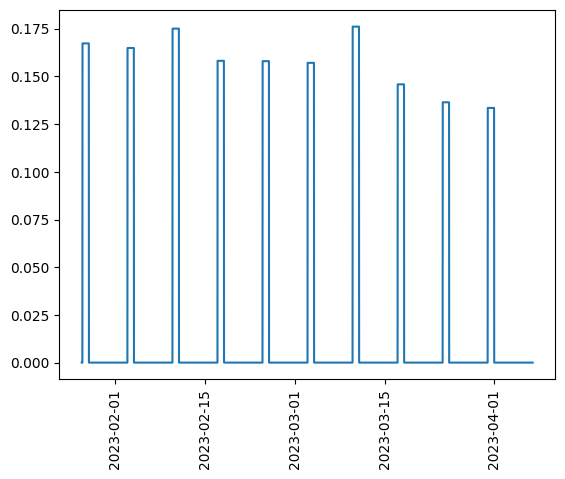

In [8]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)

ax.plot(snapshots.index, snapshots["position"])
plt.show()